<a href="https://colab.research.google.com/github/hamagami/preprocess/blob/main/06_02_water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggleの水質に関するデータの例　ほぼ数値データ

In [ ]:
!pip install -U  pandas_profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pdp

ph(ph値)　　Hardness(硬度) Solid(溶解固形物)　Chlormines(クロラミン) Sulfate(硫酸塩)　Conductivity(導電率) 	Organic_carbon(有機炭素）	Trihalomethanes(トリハロメタン)	Turbidity(濁度) 	Potability(飲用可能性 1 OK  0 NG）

In [ ]:
df = pd.read_csv("https://dl.dropbox.com/s/g8htb1fmd3uo24a/water_potability.csv")
df.head()

ph    Hardness        Solids  ...  Trihalomethanes  Turbidity  Potability
0       NaN  204.890455  20791.318981  ...        86.990970   2.963135           0
1  3.716080  129.422921  18630.057858  ...        56.329076   4.500656           0
2  8.099124  224.236259  19909.541732  ...        66.420093   3.055934           0
3  8.316766  214.373394  22018.417441  ...       100.341674   4.628771           0
4  9.092223  181.101509  17978.986339  ...        31.997993   4.075075           0

[5 rows x 10 columns]

## 欠損値，統計量のチェック

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()

ph     Hardness  ...    Turbidity   Potability
count  2785.000000  3276.000000  ...  3276.000000  3276.000000
mean      7.080795   196.369496  ...     3.966786     0.390110
std       1.594320    32.879761  ...     0.780382     0.487849
min       0.000000    47.432000  ...     1.450000     0.000000
25%       6.093092   176.850538  ...     3.439711     0.000000
50%       7.036752   196.967627  ...     3.955028     0.000000
75%       8.062066   216.667456  ...     4.500320     1.000000
max      14.000000   323.124000  ...     6.739000     1.000000

[8 rows x 10 columns]

ヒストグラムのチェック

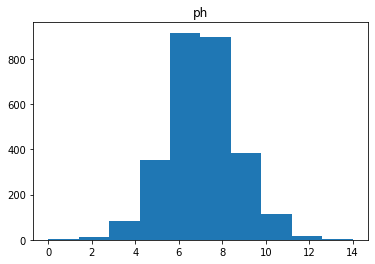

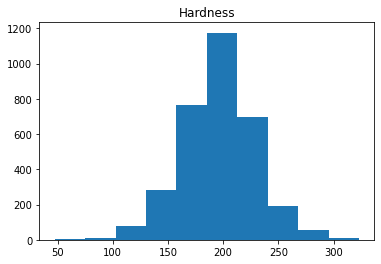

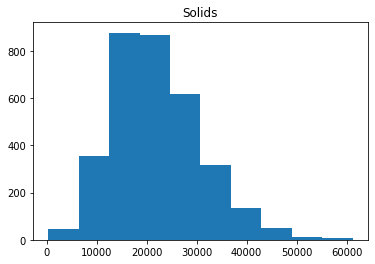

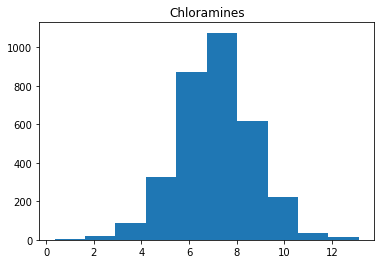

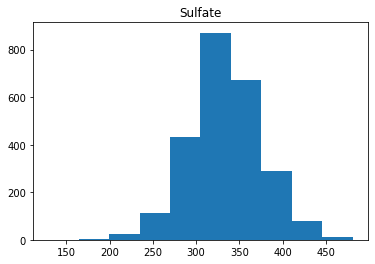

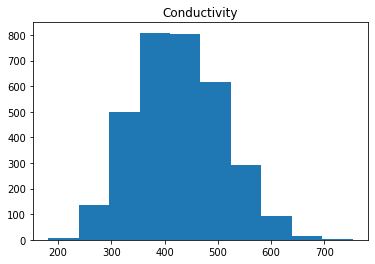

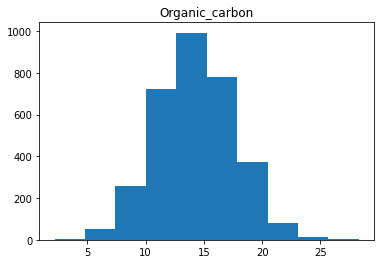

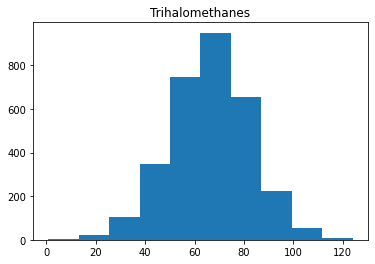

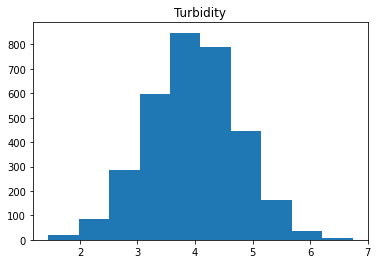

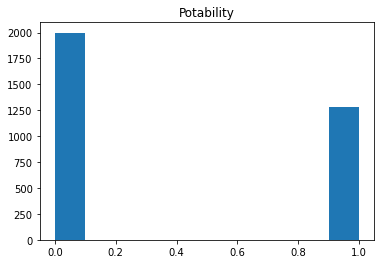

In [ ]:
for col in df.columns:
  plt.hist(df[col].values)
  plt.title(col)
  plt.show()

## 欠損値を正確に把握

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

データは結構数あるので，NaNはドロップする

In [ ]:
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


Potability のバランス　を確認



In [ ]:
df.Potability.value_counts() #１のほうが少ない

0    1200
1     811
Name: Potability, dtype: int64

データのリサンプリングによって調整

In [ ]:
zero  = df[df['Potability']==0]   #Potability 0 (飲めない)のセット
one = df[df['Potability']==1]  #Potability 1(飲める）のセット
from sklearn.utils import resample

df_minority_upsampled = resample(one, replace = True, n_samples = 1200) 
#concatenate
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence

In [ ]:
df.Potability.value_counts() #０と１の数が同じになる

1    1200
0    1200
Name: Potability, dtype: int64

In [ ]:
pdp.ProfileReport(df)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

duplicate があるのでこれをはずしておく

Portabilityとの相関を数値で確認

In [ ]:
df.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Solids             0.040262
Organic_carbon     0.034573
Chloramines        0.032701
Trihalomethanes    0.027748
Turbidity          0.027192
Conductivity       0.004611
Hardness           0.003936
Sulfate            0.003739
ph                 0.001528
Name: Potability, dtype: float64

In [ ]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

## 説明変数の標準化

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features= X.columns
X[features] = sc.fit_transform(X[features])

## 判別器のモジュール

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

訓練データとテストデータに分割

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

# 以下，いくつかの判別機械学習アルゴリズムをつかって学習　
ただしハイパーパラメータの調整は行っていないので厳密な性能評価ではない

## ロジスティック回帰

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred))

confusion matrix = 
 [[66 53]
 [55 66]]
accuracy =  0.55
precision =  0.5546218487394958
recall =  0.5454545454545454
f1 score =  0.5499999999999999


## ニューラルネットワーク

In [ ]:
clf = MLPClassifier(solver="adam",random_state=0, max_iter=10000)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred))

confusion matrix = 
 [[94 25]
 [34 87]]
accuracy =  0.7541666666666667
precision =  0.7767857142857143
recall =  0.71900826446281
f1 score =  0.7467811158798283


## SVC (SVMによるクラス判別）

In [ ]:
clf = SVC(gamma="scale")
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred))

confusion matrix = 
 [[100  19]
 [ 44  77]]
accuracy =  0.7375
precision =  0.8020833333333334
recall =  0.6363636363636364
f1 score =  0.7096774193548386


## ランダムフォレスト

In [ ]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=2, random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred))

confusion matrix = 
 [[110   9]
 [ 17 104]]
accuracy =  0.8916666666666667
precision =  0.9203539823008849
recall =  0.859504132231405
f1 score =  0.888888888888889


## AdaBoost

In [ ]:
ada = AdaBoostClassifier(n_estimators= 600, learning_rate= 1 )
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred))


confusion matrix = 
 [[80 39]
 [42 79]]
accuracy =  0.6625
precision =  0.6694915254237288
recall =  0.6528925619834711
f1 score =  0.6610878661087867


## XGBoost


In [ ]:
xgb = XGBClassifier(n_estimators= 250, learning_rate= 0.8)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred))


confusion matrix = 
 [[ 89  30]
 [ 18 103]]
accuracy =  0.8
precision =  0.7744360902255639
recall =  0.8512396694214877
f1 score =  0.811023622047244
